In [206]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
theta1 =  4* np.pi / 180
theta2 = -12* np.pi / 180
theta3 = +12 * np.pi / 180

In [222]:

#This function contracts the lines with ratio r.
def contract(coordinates,r):
    newcoordinates = []
    for i in range(len(coordinates)):
        p = coordinates[i] * r
        newcoordinates.append(p)
    return(newcoordinates)

#we need this new function for contracting with different amounts in x and y direction.
def contractxy(coordinates,r,k):
    newcoordinates = []
    cntr_xy = np.array([[r,0],[0,k]])
    for i in range(len(coordinates)):
        p = np.matmul(cntr_xy, coordinates[i]) 
        newcoordinates.append(p)
    return(newcoordinates)

#This function moves the line in 2D space. where x is the amount by which the line is moved horizontally.
def translation(coordinates,x,y):
    newcoordinates=[]
    for i in range(len(coordinates)):
        p = coordinates[i]  +  np.array([x,y])
        newcoordinates.append(p)
    return(newcoordinates)

#a function for rotating the line by (th) angle.
def rotation(coordinates,th):
    newcoordinates = []
    rotate = np.array([[np.cos(th),np.sin(-th)],[np.sin(th),np.cos(th)]])
    for i in range(len(coordinates)):
        p = np.matmul(rotate, coordinates[i]) 
        newcoordinates.append(p)
    return(newcoordinates)

# the main big leaves contracted by 0.8 and 0.9 in y and x directionm, rotated by theta 1 and moves upward with 1.
def function1(coordinates):
    temp = rotation(coordinates,theta1)
    temp = contractxy(temp,(0.9),0.8)
    temp = translation(temp, 0,1)
    return(temp)

# the small leaves on the right side, larger rotation angle.
def function2(coordinates):
    temp = rotation(coordinates,theta2)
    temp = contractxy(temp,(0.3),0.4)
    temp = translation(temp, 0,1)
    return(temp)

#the small leaves on the left, also contracted with a negative co-efficent to make the curvature upward.
def function3(coordinates):
    temp = contractxy(coordinates,-(0.3),0.4)
    temp = rotation(temp,theta3)
    temp = translation(temp, 0,0.5)
    return(temp)

#the stem. contracting with 0.01 in x direction and 0.25 in y direction. same rotation as the main part.
def function4(coordinates):
    temp = rotation(coordinates,theta1)
    temp = contractxy(temp,(0.01),0.25)
    #temp = translation(temp, 0,0.5)
    return(temp)



In [143]:
p = np.array([[1,5],[3,3]])
a = contractxy(p,0.5,0.2)
b = contract(p,0.2)
print(a)
print(b)

[array([0.5, 1. ]), array([1.5, 0.6])]
[array([0.2, 1. ]), array([0.6, 0.6])]


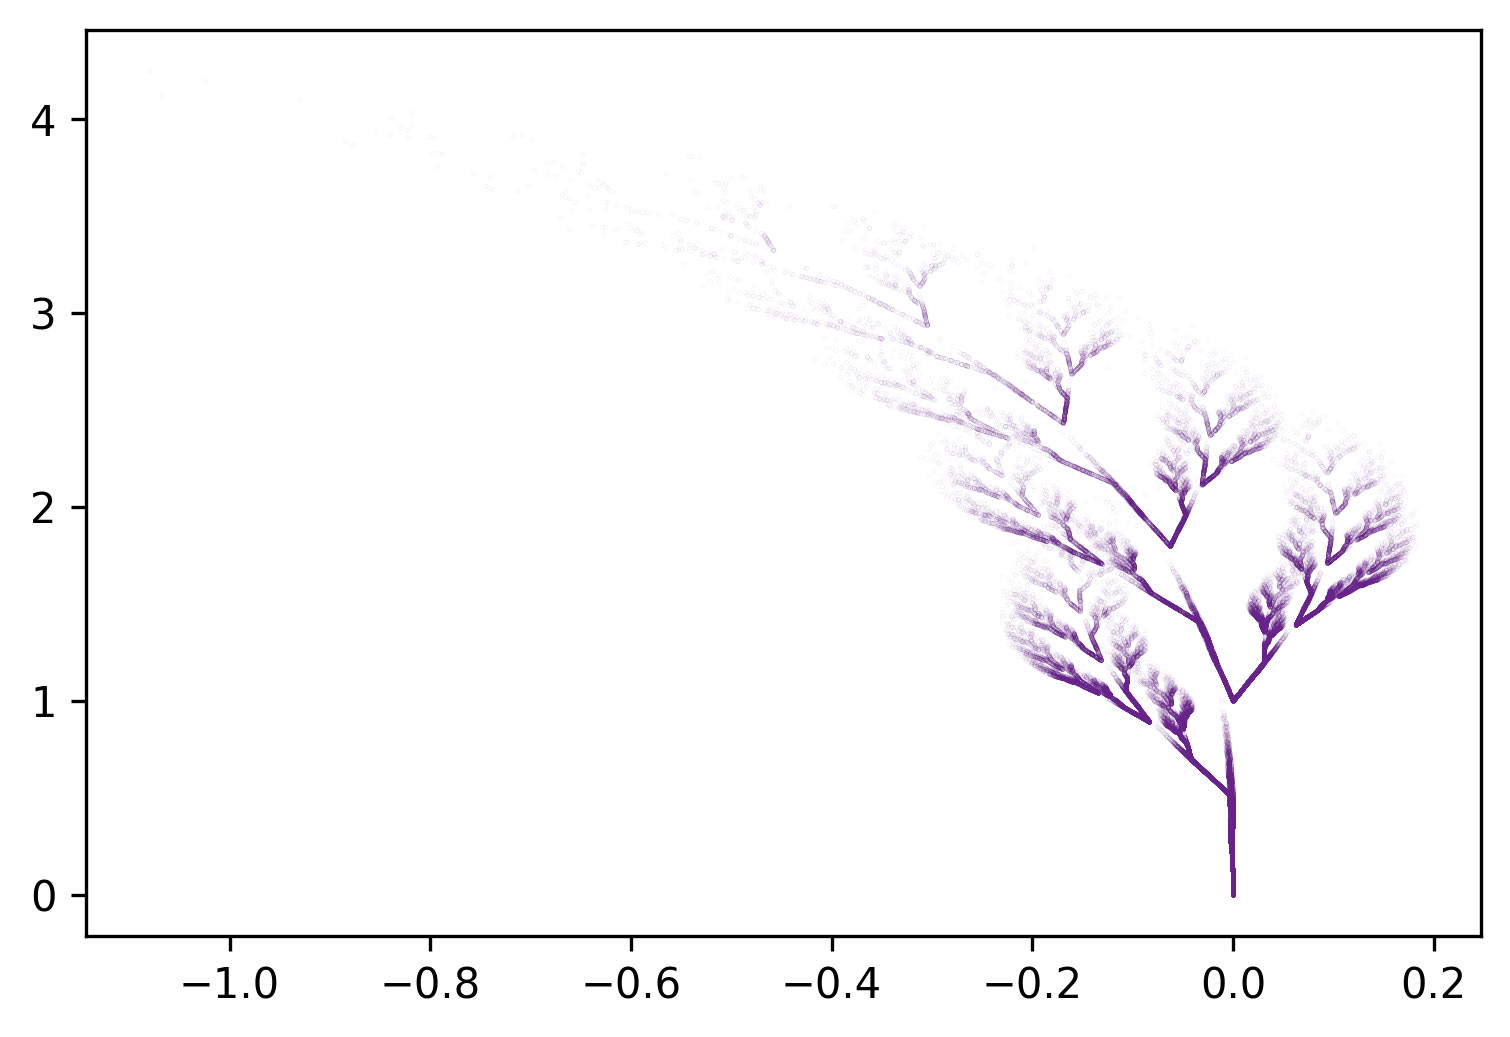

In [223]:
a = [1,2,3,4]
plt.figure(dpi=300)
for i in range(120000):                                                                 #Loop for  L points
    point = np.array([[rnd.uniform(-1, 1), rnd.uniform(0, 4)]])                         #choosing a random points in a 1 by 4 rectangel
    for j in range(10):                                                                 #Loop for implementing functions in a radom oderd for N times
        b = rnd.choice(a)                                                              #Generating random b for the sequence
        if b == 1:
            point = function1(point)
        elif b == 2:
            point = function2(point)
        elif b == 3:
            point = function3(point)
        elif b == 4:
            point = function4(point)    
    plt.plot(point[0][0],point[0][1], marker="o", markersize=0.01, markeredgecolor="#68228B")    #plotting
plt.savefig('Sarakhs1200000', dpi=300 )
plt.show()